In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
import seaborn as sns

In [3]:
'''
gre_mean = df['GRE'].mean()
gre_ceil = math.ceil(gre_mean)
print(gre_ceil)
df['GRE'] = df['GRE'].replace(to_replace=np.nan, value=gre_ceil)
df.GRE = df['GRE'].astype('int32')
'''

"\ngre_mean = df['GRE'].mean()\ngre_ceil = math.ceil(gre_mean)\nprint(gre_ceil)\ndf['GRE'] = df['GRE'].replace(to_replace=np.nan, value=gre_ceil)\ndf.GRE = df['GRE'].astype('int32')\n"

In [4]:
li = []
def format_eng(sc):
    for i in range(len(sc)):
        if(sc[i]>=0 and sc[i]<=4):
            new_score = (0+31)//2
            li.append(new_score)
            #print(new_score)
            #return li
        elif(sc[i]>=4.5 and sc[i]<=5):
            new_score = (32+34)//2
            li.append(new_score)
            #print(new_score)
        elif(sc[i]>=5 and sc[i]<=5.5):
            new_score = (35+45)//2
            li.append(new_score)
            #print(new_score)
        elif(sc[i]>=5.5 and sc[i]<=6):
            new_score = (46+49)//2
            li.append(new_score)
            #print(new_score)
        elif(sc[i]>=6 and sc[i]<=6.5):
            new_score = (60+78)//2
            li.append(new_score)
            #print(new_score)
        elif(sc[i]>=6.5 and sc[i]<=7):
            new_score = (79+93)//2
            li.append(new_score)
            #print(new_score)
        elif(sc[i]>=7 and sc[i]<=7.5):
            new_score = (94+101)//2
            li.append(new_score)
            #print(new_score)
        elif(sc[i]>=7.5 and sc[i]<=8):
            new_score = (102+109)//2
            li.append(new_score)
            #print(new_score)
        elif(sc[i]>=8 and sc[i]<=8.5):
            new_score = (110+114)//2
            #print(new_score)
            li.append(new_score)
        elif(sc[i]>=8.5 and sc[i]<=9):
            new_score = (115+117)//2
            li.append(new_score)
            #print(new_score)
            #return li
        elif(sc[i]>=9 and sc[i]<=10):
            new_score = (118+120)//2
            li.append(new_score)
            #print(new_score)
            #return li
        else:
            li.append(sc[i])
            #return li
            #print(sc)
    df['TOEFL/IELTS'] = li


In [5]:
#print(list(df['TOEFL/IELTS']))


In [6]:
marks_list = []
def format_marks(li):
    for marks in range(len(li)):
        if(li[marks] >=0 and li[marks]<=10):
            gpa = li[marks] * 9.5
            marks_list.append(gpa)
        else:
            marks_list.append(li[marks])
    #print(len(marks_list))
    df['MARKS'] = marks_list
            
            
        

In [7]:
new_df = pd.read_excel('ADMITS.xlsx')
new_df

,University name,GRE,TOEFL/IELTS,MARKS,WORKEX-MONTHS,DECISION
0,SUNY Buffalo,313,103,68,27,A
1,NEU,313,103,68,27,A
2,Polytech NY,313,103,68,27,A
3,ASU,313,103,68,27,A
4,NCSU,313,103,68,27,R
5,Univ of Chicago,313,103,68,27,R
6,ASU,324,116,87,21,A
7,NCSU,322,104,80,24,A
8,ASU,322,104,80,24,A
9,ASU,310,98,76,24,A


In [8]:
admits_univ = new_df[new_df['DECISION'] == 'A']
rejects_univ = new_df[new_df['DECISION'] == 'R']

In [9]:
admits_univ
grp = admits_univ.groupby('University name')['DECISION'].count()
series = pd.Series(grp)
count_list = []
name_list = []
for j, k in series.items():
    count_list.append(k)
    name_list.append(j)

<Figure size 36000x14400 with 0 Axes>

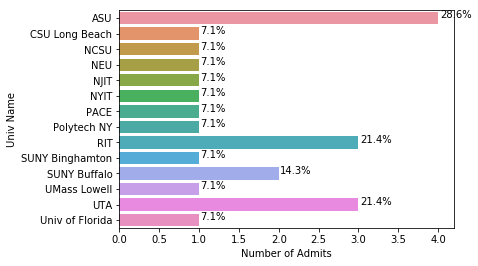

<Figure size 36000x14400 with 0 Axes>

In [10]:
count_admits = pd.DataFrame({'Univ Name': name_list, 'Number of Admits': count_list})
ax = sns.barplot(x="Number of Admits", y="Univ Name", data=count_admits,label="University names vs number of admits")
total = len(count_admits['Univ Name'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.figure(figsize=(500,200))

In [11]:
rejects_univ

,University name,GRE,TOEFL/IELTS,MARKS,WORKEX-MONTHS,DECISION
4,NCSU,313,103,68,27,R
5,Univ of Chicago,313,103,68,27,R
12,Stony Brook,315,99,71,24,R
13,NEU,315,99,71,24,R
14,NCSU,315,99,71,24,R
15,Univ Amherest,315,99,71,24,R
22,USC,310,99,68,24,R
23,UPenn,310,99,68,24,R
24,UCI,310,99,68,24,R
25,UTD,310,99,68,24,R


In [12]:
rejects_grp = rejects_univ.groupby('University name')['DECISION'].count()
series = pd.Series(rejects_grp)
count_list = []
name_list = []
for j, v in series.items():
    count_list.append(v)
    name_list.append(j)

<Figure size 36000x14400 with 0 Axes>

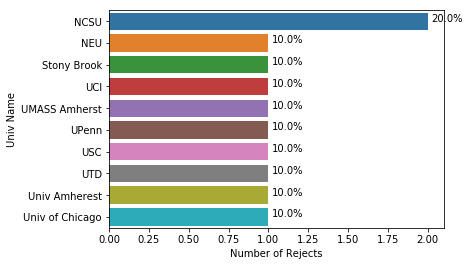

<Figure size 36000x14400 with 0 Axes>

In [13]:
count_rejects = pd.DataFrame({'Univ Name': name_list, 'Number of Rejects': count_list})
ax = sns.barplot(x="Number of Rejects", y="Univ Name", data=count_rejects,label="University names vs number of rejects")
total = len(count_rejects['Univ Name'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.figure(figsize=(500,200))

In [14]:
unique_names = new_df['University name'].unique()

In [15]:
unique_list = list(unique_names)

In [16]:
le = preprocessing.LabelEncoder()
univ_names_list = le.fit_transform(new_df['University name'])
univ_names_list

array([10,  3,  7,  0,  2, 20,  0,  2,  0,  0, 21,  8, 11,  3,  2, 19, 17,
        4,  1,  8, 10,  9, 16, 15, 12, 18, 17, 14,  8,  6, 17,  5, 13])

In [17]:
new_df['Labels'] = univ_names_list
lbelencoded_vals = new_df['Labels']
label_array = np.array(lbelencoded_vals)
train_df = new_df.iloc[:, 1:5]
train_df['Labels'] = new_df.iloc[:, -1]
new_df

,University name,GRE,TOEFL/IELTS,MARKS,WORKEX-MONTHS,DECISION,Labels
0,SUNY Buffalo,313,103,68,27,A,10
1,NEU,313,103,68,27,A,3
2,Polytech NY,313,103,68,27,A,7
3,ASU,313,103,68,27,A,0
4,NCSU,313,103,68,27,R,2
5,Univ of Chicago,313,103,68,27,R,20
6,ASU,324,116,87,21,A,0
7,NCSU,322,104,80,24,A,2
8,ASU,322,104,80,24,A,0
9,ASU,310,98,76,24,A,0


In [40]:
new_df[new_df['University name'] == 'UCI']

,University name,GRE,TOEFL/IELTS,MARKS,WORKEX-MONTHS,DECISION,Labels,Clusters
24,UCI,310,99,68,24,R,12,8


In [19]:
squared_distance = []
sil = []
iterrations = []
for i in range(2,33):
    iterrations.append(i)
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter = len(train_df), n_init=20)
    km = kmeans.fit(new_df.iloc[:, 1:4])
    labels = kmeans.labels_
    squared_distance.append(km.inertia_)
    sil.append(silhouette_score(new_df.iloc[:, 1:4], labels, metric = 'euclidean'))
squared_distance = [i/100 for i in squared_distance]

C:\Users\Anirudh Deshpande\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Anirudh Deshpande\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Anirudh Deshpande\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Anirudh Deshpande\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Anirudh Deshpande\Anaconda3\lib\site-package

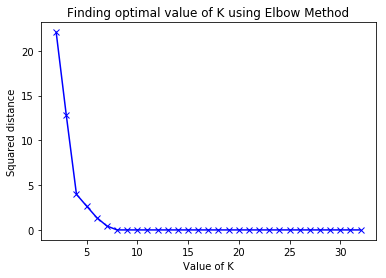

In [20]:
plt.plot(iterrations, squared_distance, 'bx-')
plt.xlabel('Value of K')
plt.ylabel('Squared distance')
plt.title('Finding optimal value of K using Elbow Method')
plt.show()

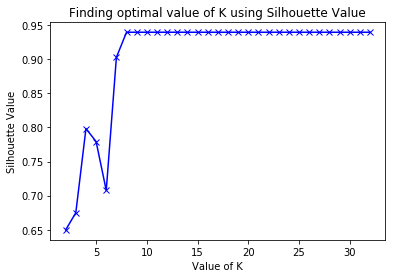

In [21]:
plt.plot(iterrations, sil, 'bx-')
plt.xlabel('Value of K')
plt.ylabel('Silhouette Value')
plt.title('Finding optimal value of K using Silhouette Value')
plt.show()

In [22]:
kmeans = KMeans(n_clusters=25, init='k-means++', max_iter = 200, n_init=20, random_state=0)
arr = np.array(new_df['Labels'])
km = kmeans.fit_predict(np.reshape(arr, (-1,1)))
km 

C:\Users\Anirudh Deshpande\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (22) found smaller than n_clusters (25). Possibly due to duplicate points in X.
  return_n_iter=True)


array([ 0,  7,  3,  6,  1,  5,  6,  1,  6,  6, 14, 10, 20,  7,  1, 12,  2,
       16, 19, 10,  0, 18, 13, 17,  8, 21,  2,  4, 10,  9,  2, 15, 11])

In [23]:
cluster_numbers = []
for clust in range(len(km)):
    cluster_numbers.append(km[clust])

In [24]:
new_df['Clusters'] = cluster_numbers
new_df[['University name', 'Clusters']]
mydf = new_df[new_df['Clusters'] == 1]
mydf

,University name,GRE,TOEFL/IELTS,MARKS,WORKEX-MONTHS,DECISION,Labels,Clusters
4,NCSU,313,103,68,27,R,2,1
7,NCSU,322,104,80,24,A,2,1
14,NCSU,315,99,71,24,R,2,1


In [25]:
new_df['Labels'] = train_df['Labels']

In [26]:
del train_df['Labels']

In [27]:
KMeans_df = pd.DataFrame()
KMeans_df['Univ_name'] = new_df['University name']
KMeans_df['Clusters'] = new_df['Clusters']
KMeans_df

,Univ_name,Clusters
0,SUNY Buffalo,0
1,NEU,7
2,Polytech NY,3
3,ASU,6
4,NCSU,1
5,Univ of Chicago,5
6,ASU,6
7,NCSU,1
8,ASU,6
9,ASU,6


In [28]:
univ_name_unique = KMeans_df['Univ_name'].unique()

In [29]:
test_df = pd.read_csv('Test_data.csv', names=['University name', 'GRE', 'TOEFL/IELTS', 'MARKS', 'WORKEX-MONTHS'])
test_df

,University name,GRE,TOEFL/IELTS,MARKS,WORKEX-MONTHS
0,NCSU,300,87,98,13
1,UTA,321,90,86,21
2,NEU,292,100,90,21
3,Stony Brook,300,97,98,12


In [30]:
partial_test_data = test_df.iloc[:, 1:]

In [31]:
list_test_df = list(test_df['University name'])
print(list_test_df)

['NCSU', 'UTA', 'NEU', 'Stony Brook']


In [32]:
clust_numbers = []
for i in list_test_df:
    mydf = KMeans_df[KMeans_df['Univ_name'] == i]
    for k in mydf['Clusters'].unique():
        clust_numbers.append(k)

In [33]:
clust_numbers
test_df['Clusters'] = clust_numbers

In [34]:
test_df

,University name,GRE,TOEFL/IELTS,MARKS,WORKEX-MONTHS,Clusters
0,NCSU,300,87,98,13,1
1,UTA,321,90,86,21,2
2,NEU,292,100,90,21,7
3,Stony Brook,300,97,98,12,20


In [38]:
test_li = []
li = []
dic = {}
target_label_encoding = preprocessing.LabelEncoder()
knn = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
for clusters in clust_numbers:
    li.clear()
    mytraindf = new_df[new_df['Clusters'] == clusters]
    #print(mytraindf)
    maximum = max(mytraindf['GRE'])
    max_record = mytraindf[mytraindf['GRE'] == maximum]
    #print(max_record)
    test_record = test_df[test_df['Clusters'] == clusters]
    #print(test_record)
    test_record_section = test_record.iloc[:, 1:5]
    #print(list(mytraindf['DECISION']))
    decs = list(mytraindf['DECISION'])
    #print(mytraindf['DECISION'])
    max_record_section = max_record.iloc[:, 1:5]
    train_section = mytraindf.iloc[:, 1:5]
    #print(train_section)
    #print(decs)
    inp = int(input("Press 1 to exit: "))
    if(inp == 1):
        break
    else:
        X_train = train_section.values
        X_test = test_record_section.values
        knn.fit(X_train, decs)
        y_pred = knn.predict(X_test)
        print(y_pred)
        '''
        acc = metrics.accuracy_score(y_class, y_pred)
        print(acc)
        '''

Press 1 to exit: 4
['A']
Press 1 to exit: 4
['A']
Press 1 to exit: 3
['R']
Press 1 to exit: 5
['R']


### 